# Optimal epoch number

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *


# from Data_sorting import Data_formatter_cycles

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_2840\1782324082.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/Data formatting/Dataset_scaled_denoised.xlsx')
data = data[data['I'] == 1.6]
X = data.iloc[1:,:9]
X = X.drop('I', axis = 1)
y = data.iloc[1:,11:16]

In [3]:
print(X)

          S8_cur    S4_cur    S2_cur    S1_cur     V_cur    Sp_cur        EH  \
1       2.914558 -2.960002 -0.929154 -0.232859  3.965686 -0.925127  3.914506   
2       2.914450 -2.959872 -0.929154 -0.232859  3.953539 -0.925127  3.902619   
3       2.914342 -2.959743 -0.929154 -0.232858  3.941755 -0.925127  3.891043   
4       2.914234 -2.959613 -0.929154 -0.232858  3.930271 -0.925127  3.879762   
5       2.914126 -2.959483 -0.929154 -0.232858  3.919073 -0.925127  3.868761   
...          ...       ...       ...       ...       ...       ...       ...   
144008 -0.715584 -0.685340  2.665422 -0.146794 -0.871377  2.664142 -0.874464   
144009 -0.715584 -0.685383  2.665497 -0.146795 -0.871381  2.664216 -0.874468   
144010 -0.715584 -0.685426  2.665571 -0.146795 -0.871385  2.664290 -0.874473   
144011 -0.715584 -0.685469  2.665645 -0.146796 -0.871390  2.664365 -0.874477   
144012 -0.715584 -0.685512  2.665719 -0.146797 -0.871394  2.664439 -0.874481   

              EL  
1       4.072668  
2

In [3]:
X_S8 = X.copy()
X_S8 = X_S8.drop('S1_cur', axis = 1)
X_S8 = X_S8.drop('S2_cur', axis = 1)
X_S8 = X_S8.drop('Sp_cur', axis = 1)
# X_S8 = X_S8.drop('V_cur', axis = 1)
# X_S8 = X_S8.drop('iH', axis = 1)
   

y_S8 = y['S8_cur.1']

X_numpy_S8 = X_S8.values
y_numpy_S8 = y_S8.values

# Split the data into train and test sets
X_train_S8, X_test_S8, y_train_S8, y_test_S8 = train_test_split(X_numpy_S8, y_numpy_S8, test_size=0.2, random_state=42)

In [4]:
def optimal_epoch(X,y):

    error = pd.DataFrame(columns = ['mse','epoch_number'])

    for i in range(20,101,10):
        model8 = Sequential()
        model8.add(Dense(5, activation='relu', input_dim = 5))
        # model.add(Dense(6, activation='relu'))
        # model.add(Dense(12,activation = 'relu'))
        # model8.add(Dense(5,activation = 'relu'))
        # model.add(Dense(10, activation='relu'))
        model8.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

        # Compile the model
        model8.compile(optimizer='adam', loss='mean_squared_error')

        model8.fit(X_train_S8, y_train_S8, epochs=i, batch_size=32)
        
        # Evaluate the model on the test set
        mse = model8.evaluate(X_test_S8, y_test_S8)
        print(f"Mean Squared Error on Test Set: {mse}")

        error.loc[len(error)] = [mse, int(i)]

    # Find the index of the row with the smallest MSE
    min_mse_index = error['mse'].idxmin()

    # Get the epoch number value corresponding to the smallest MSE
    min_mse_epoch = error.loc[min_mse_index, 'epoch_number']

    return error, min_mse_epoch


# model8 = Sequential()
# model8.add(Dense(10, activation='relu', input_dim = 5))
# # model.add(Dense(6, activation='relu'))
# # model.add(Dense(12,activation = 'relu'))
# model8.add(Dense(5,activation = 'relu'))
# # model.add(Dense(10, activation='relu'))
# model8.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# # Compile the model
# model8.compile(optimizer='adam', loss='mean_squared_error')

# model8.fit(X_train_S8, y_train_S8, epochs=min_mse_epoch, batch_size=32)


error, epoch = optimal_epoch(X_train_S8,y_train_S8)




Epoch 1/20

3601/3601 [==============================] - 3s 760us/step - loss: 0.0621
Epoch 2/20
3601/3601 [==============================] - 3s 756us/step - loss: 0.0015
Epoch 3/20
3601/3601 [==============================] - 3s 761us/step - loss: 1.4531e-04
Epoch 4/20
3601/3601 [==============================] - 3s 750us/step - loss: 5.7430e-05
Epoch 5/20
3601/3601 [==============================] - 3s 749us/step - loss: 4.1052e-05
Epoch 6/20
3601/3601 [==============================] - 3s 715us/step - loss: 3.4783e-05
Epoch 7/20
3601/3601 [==============================] - 3s 709us/step - loss: 2.9589e-05
Epoch 8/20
3601/3601 [==============================] - 3s 736us/step - loss: 2.4367e-05
Epoch 9/20
3601/3601 [==============================] - 3s 704us/step - loss: 2.0326e-05
Epoch 10/20
3601/3601 [==============================] - 3s 694us/step - loss: 1.6935e-05
Epoch 11/20
3601/3601 [==============================] - 2s 690us/step - loss: 1.3070e-05
Epoch 12/20
3601/3601 [=

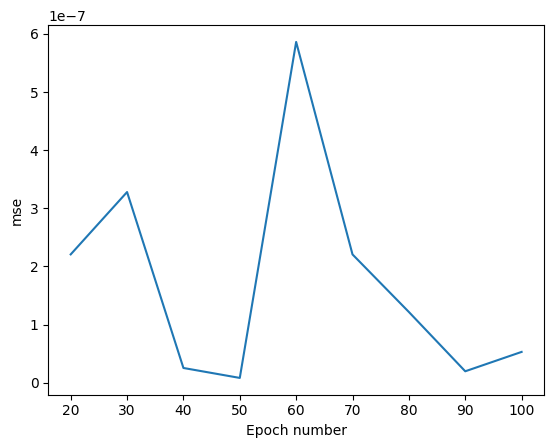

In [5]:
plt.plot(error['epoch_number'], error['mse'])
plt.xlabel('Epoch number')
plt.ylabel('mse')
plt.show()
